<span style="font-family:Papyrus; font-size:3em;">BIOE 498 Midterm</span>

<span style="font-family:Papyrus; font-size:2em;">Design of Experiments</span>

# Problem

BioModels model 45 shows bursting behavior of Calcium oscillations using the chemical species ``EC``, ``X``, ``Y``, and ``Z``.
Find initial values of these chemical species such that ``Y`` oscillates for the longest, unbroken time period starting at time 0.
This choice of initial values should preserve the burst oscillations for ``X`` and ``Y``
in the time intervals [10, 25] and [40, 50].
The choice of initial
values should result in simulated values that are non-negative.

1. (10 pts) **Design of Experiments**. What is your experimental design (where the factors are the chemical species
and the levels are initial values).
Explain why you chose the particular levels.
Note that you may choose to do an *adapative design* in which an initial design is chosen and then
the outcome of this experiment results in a second experimental design.

1. (25 pts) **Experimental Infrastructure**. Implement the following functions.
   1. ``checkBursts`` returns True if there are exactly two bursts of oscillations.
   1. ``findMaxY`` returns the maximum value of ``Y``.
   1. ``runExperiment`` runs an experiment for levels of the chemical species and returns the maximum value of ``Y``
   if the burst behavior is preserved; otherwise it returns 0.
   1. ``runStudy`` runs a set of experiments as dictated by the experimental design.
   
1. (15 pts) **Studies and Analysis**. Plot the results of the study, showing interactions between factor levels as appropriate. Report the combination of initial values that produces the maximum value of ``Y``.

Please put your answers to these questions in the separate sections below.

# Programming Preliminaries
This section provides the setup to run your python codes.

In [1]:
IS_COLAB = False
#
if IS_COLAB:
  !pip install matplotlib
  !pip install numpy
  !pip install tellurium
  !pip install SBstoat
#    
# Constants for standalone notebook
if not IS_COLAB:
    COMMON_DIR = "/home/ubuntu/advancing-biomedical-models/common"
else:
    from google.colab import drive
    drive.mount('/content/drive')
    COMMON_DIR = "/content/drive/MyDrive/Modeling_Class/Winter 2021/common"
import sys
sys.path.insert(0, COMMON_DIR)

In [16]:
import util_doe1  # Various functions from lecture 5
import util_doe2  # Various functions from lecture 6

import numpy as np
import pandas as pd
import os
import tellurium as te

# Model

In [3]:
modelPath = os.path.join(COMMON_DIR, "BIOMD0000000045_url.xml")
ROADRUNNER = te.loads(modelPath)
print(ROADRUNNER.getAntimony())

// Created by libAntimony v2.12.0
model *Goldbeter_Calcium_Oscillation_based_onCICR_AND_two_pool_model()

  // Compartments and Species:
  compartment extracellular, cytosol, intravesicular1, intravesicular2;
  species EC in extracellular, Z in cytosol, Y in intravesicular2, X in intravesicular1;

  // Reactions:
  vin: EC => Z; cytosol*(vin_v0 + vin_v1*beta);
  v2i: Z => Y; intravesicular2*v2i_Vm2i*Z^2/(v2i_K2i^2 + Z^2);
  v3i: Y => Z; cytosol*v3i_Vm3i*Y^2*Z^2/((v3i_K3y^2 + Y^2)*(v3i_K3z^2 + Z^2));
  v4: Y => Z; cytosol*v4_Kf*Y;
  v5: Z => EC; extracellular*v5_K*Z;
  v6: X => Z; cytosol*v6_Kf*X;
  v2s: Z => X; intravesicular1*v2s_Vm2s*Z^2/(v2s_K2s^2 + Z^2);
  v3s: X => Z; cytosol*beta*v3s_Vm3s*X^2/(v3s_K3s^2 + X^2);

  // Species initializations:
  EC = 0;
  Z = 0;
  Y = 0;
  X = 0.5;

  // Compartment initializations:
  extracellular = 1;
  cytosol = 1;
  intravesicular1 = 1;
  intravesicular2 = 1;

  // Variable initializations:
  beta = 1;
  vin_v0 = 0.015;
  vin_v1 = 0.012;
  v2i_

In [13]:
# Simulation constants
START_TIME = 0  # Start time for the simulation
END_TIME = 60  # End time for the simulation
BURST_DCT = {0: (15, 25), 1: (40, 50)}  # Where bursts should be preserved
NUM_POINT = 10*(END_TIME - START_TIME)  # Number of points in output
PARAMETERS = ["X", "Y", "Z", "EC"]

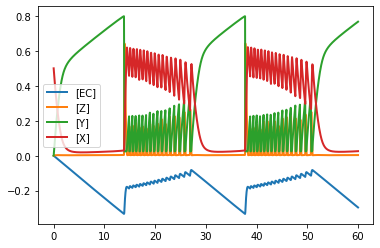

In [5]:
ROADRUNNER.plot(ROADRUNNER.simulate(0,60, 1200))

Note that ``Y`` does not start oscillating at 0. Also, the oscillations are broken into two segments. We
are looking for an unbroken oscillation of ``Y`` starting at time 0.

# Design of Experiments

# Experimental Infrastructure

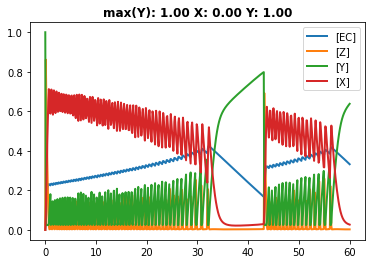

In [23]:
def runExperiment(parameterDct):
    """
    """
    ROADRUNNER.reset()
    for parameter, value in parameterDct.items():
        ROADRUNNER[parameter] = value
    data = ROADRUNNER.simulate(START_TIME, END_TIME, NUM_POINT)
    maxY = max(data["[Y]"])
    title = " ".join(["%s: %1.2f" % (k, v) for k, v in parameterDct.items()])
    title = "max(Y): %2.2f " % maxY + title
    ROADRUNNER.plot(data, title=title)

runExperiment({"X": 0, "Y": 1})

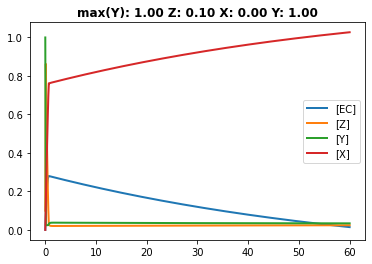

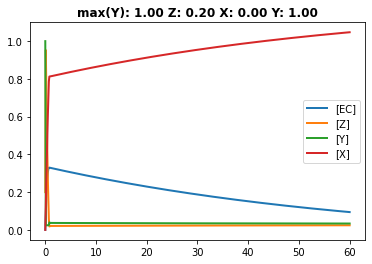

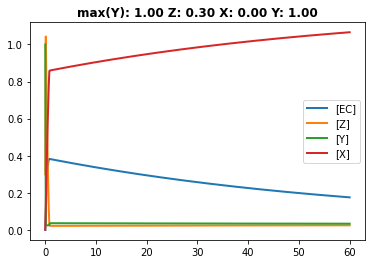

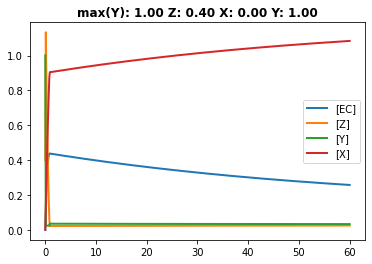

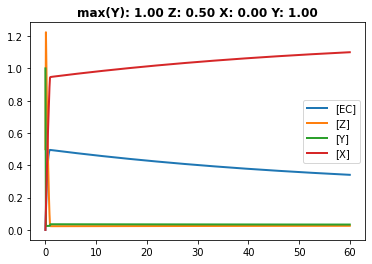

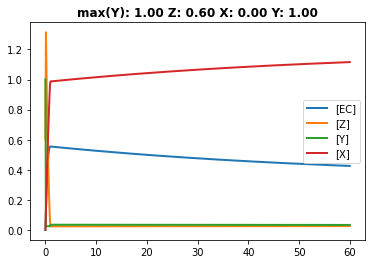

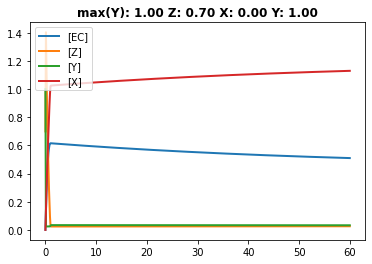

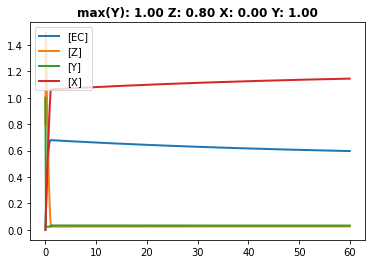

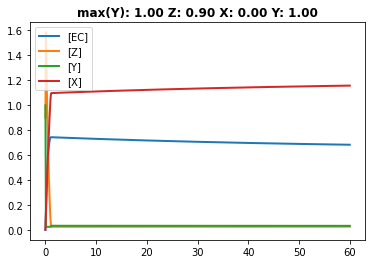

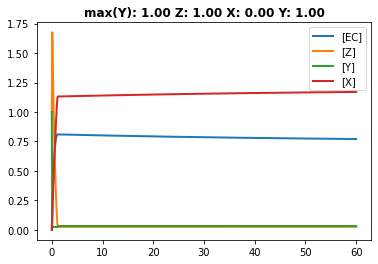

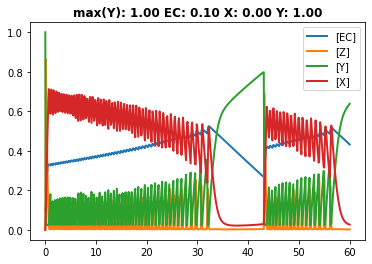

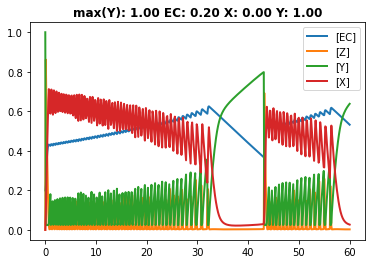

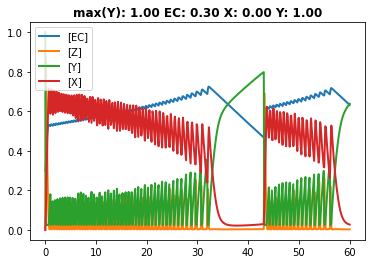

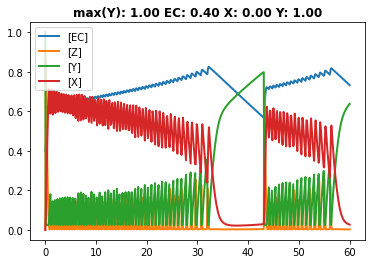

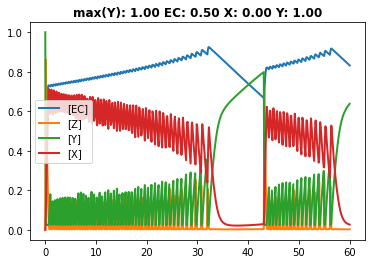

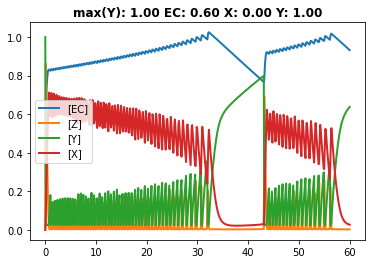

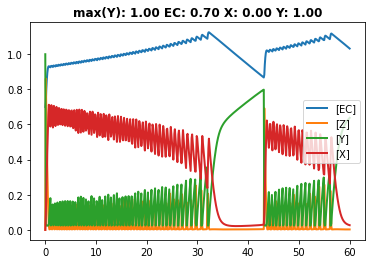

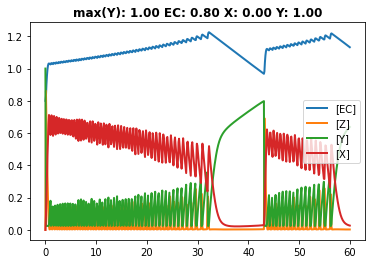

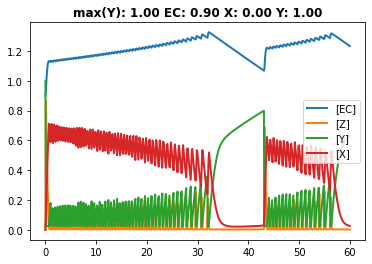

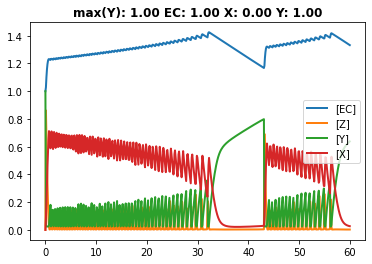

In [33]:
LEVELS = 0.1*np.array(range(1, 11))
for parameter in ["Z", "EC"]:
    for level in LEVELS:
        runExperiment({parameter: level, "X": 0, "Y": 1.0})

# Studies and Analysis